<a href="https://colab.research.google.com/github/Kemadjou-Elodie/Deep-Learning-Projet/blob/master/Projet_Test_Reylens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multi-class Text Categorization - Groupe Relyens - DATA SCIENTIST POSITION**

**Objective**. In this technical test you you are asked to solve a multi-class classification problem on
textual data using machine learning, commonly known as text categorization. The technical
test is composed of two parts, model experimentation and deployment. More details will be explained
in the corresponding sections.

***Introduction*** : 
Text feature extraction and pre-processing for classification algorithms are very significant. In this section, we start to talk about text cleaning since most of documents contain a lot of noise. In this part, we discuss two primary methods of text feature extractions- word embedding and weighted word.

***1. Load Data set*** :  

The dataset comprises around 18000 documents posts on 20 topics split in two subsets : one for training and another for testing.
The dataset is available on this link : [https://drive.google.com/file/d/
1ywHLd78-Ms5SmyEuHGmJDDGHSGsvvcD2/view?usp=sharing](https://)

In [1]:
! pip  install  googledrivedownloader

In [2]:
import os
import nltk
import random
import numpy as np
import pandas as pd

from spacy.tokenizer import Tokenizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from google_drive_downloader import GoogleDriveDownloader  as gdd
gdd.download_file_from_google_drive(file_id ='1ywHLd78-Ms5SmyEuHGmJDDGHSGsvvcD2', dest_path ='./dataset.zip', unzip=True)

Unzipping...Done.


In [3]:
data_dir_test = '/content/test'
data_dir_train = '/content/train'
df_test = load_files(data_dir_test, encoding = "utf-8", decode_error = "replace")
df_train = load_files(data_dir_train, encoding = "utf-8", decode_error = "replace")

In [4]:
len(df_test.target)

7532

In [5]:
len(df_train.target)

11314

In [6]:
## numbers of target
df_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
df_train.data[0:5]

["From: cubbie@garnet.berkeley.edu (                               )\nSubject: Re: Cubs behind Marlins? How?\nArticle-I.D.: agate.1pt592$f9a\nOrganization: University of California, Berkeley\nLines: 12\nNNTP-Posting-Host: garnet.berkeley.edu\n\n\ngajarsky@pilot.njin.net writes:\n\nmorgan and guzman will have era's 1 run higher than last year, and\n the cubs will be idiots and not pitch harkey as much as hibbard.\n castillo won't be good (i think he's a stud pitcher)\n\n       This season so far, Morgan and Guzman helped to lead the Cubs\n       at top in ERA, even better than THE rotation at Atlanta.\n       Cubs ERA at 0.056 while Braves at 0.059. We know it is early\n       in the season, we Cubs fans have learned how to enjoy the\n       short triumph while it is still there.\n",
 'From: gnelson@pion.rutgers.edu (Gregory Nelson)\nSubject: Thanks Apple: Free Ethernet on my C610!\nArticle-I.D.: pion.Apr.6.12.05.34.1993.11732\nOrganization: Rutgers Univ., New Brunswick, N.J.\nLines: 26

In [8]:
# Putting the words in the dictionary

newsgroups_full_dnry = dict()
for ind in range(len(df_train.data)):
    grp_name = df_train.target_names[df_train.target[ind]]
    if grp_name in newsgroups_full_dnry:
        newsgroups_full_dnry[grp_name] += 1
    else:
        newsgroups_full_dnry[grp_name] = 1
print("Total number of articles in dataset " + str(len(df_train.data)))

Total number of articles in dataset 11314


Pie chart of distribution of the articles

Text(0.5, 1.0, 'News groups messages distribution')

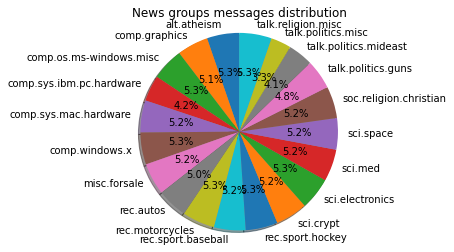

In [9]:
import matplotlib.pyplot as plt


labels = df_train.target_names

slices = []

for key in newsgroups_full_dnry:
    slices.append(newsgroups_full_dnry[key])
    
fig , ax = plt.subplots()

ax.pie(slices, labels = labels , autopct = '%1.1f%%', shadow = True, startangle = 90)

ax.axis("equal")
ax.set_title("News groups messages distribution")

***2. Text Cleaning and Pre-processing*** :

In Natural Language Processing (NLP), most of the text and documents contain many words that are redundant for text classification, such as stopwords, miss-spellings, slangs, and etc. In this section, we briefly explain some techniques and methods for text cleaning and pre-processing text documents.

In [10]:
import pandas as pd
data_labels_map = dict(enumerate(df_train.target_names))
message, target_labels, target_names = (df_train.data, df_train.target, [data_labels_map[label] for label in df_train.target])
newsgroups_full_df = pd.DataFrame({'text': message, 'source': target_labels, 'source_name': target_names})
print(newsgroups_full_df.shape)

(11314, 3)


In [11]:
newsgroups_full_df.head(10)

,text,source,source_name
0,From: cubbie@garnet.berkeley.edu ( ...,9,rec.sport.baseball
1,From: gnelson@pion.rutgers.edu (Gregory Nelson...,4,comp.sys.mac.hardware
2,From: crypt-comments@math.ncsu.edu\nSubject: C...,11,sci.crypt
3,From: ()\nSubject: Re: Quadra SCSI Problems??...,4,comp.sys.mac.hardware
4,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
5,From: taihou@chromium.iss.nus.sg (Tng Tai Hou)...,4,comp.sys.mac.hardware
6,From: huub@cwi.nl (Huub Bakker)\nSubject: wait...,5,comp.windows.x
7,From: lanzo@tekelec.com (Mark Lanzo)\nSubject:...,5,comp.windows.x
8,Subject: Why isolate it?\nFrom: chinsz@eis.cal...,13,sci.med
9,From: seema@madvlsi.columbia.edu (Seema Varma)...,12,sci.electronics


##### ***2-1 Stop words***

In [15]:
import nltk
import nltk
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stopWords = set(stopwords.words('english'))
validwords = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


**re** is regular expression library in python. We need to first define few functions such as **text_tokenizer**. The main aim is to clean the posts first by removing the alpha-numeric, numeric and non-alphabatic characters then by applying **stemming** and **lemmmatizing** techiniques so that we are left with only the words which are meaningful for the analysis. Lets write the functions for the same

In [16]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def text_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words if len(word) > 2 ]
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2 and word in validwords and word not in stopWords]
    return ' '.join(words)

Next is to apply **text_tokenizer** function to get a new column having clean text

In [18]:
nltk.download('wordnet')
newsgroups_full_df['clean_text'] = newsgroups_full_df.text.apply(lambda x: text_tokenizer(x))
newsgroups_full_df.sort_values(by=['source'],inplace=True)
newsgroups_full_df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,text,source,source_name,clean_text
3746,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism,allan schneider subject atheist organ line pun...
1398,From: william.vaughan@uuserv.cc.utah.edu (WILL...,0,alt.atheism,subject question line organ center rice rice p...
9833,From: chrisb@tafe.sa.edu.au (Chris BELL)\nSubj...,0,alt.atheism,bell subject die without death organ south reg...
3153,From: ingles@engin.umich.edu (Ray Ingles)\nSub...,0,alt.atheism,ray subject yeah right organ michigan ann arbo...
10828,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...,0,alt.atheism,subject book mormon line organ line write subj...


In [21]:
wordlst = list()
newsgroup_dic = dict()
label = ''

In [22]:
for i in range(0,20):
    newsgroups_full_df_1 = newsgroups_full_df.loc[newsgroups_full_df['source'] == i]
    for row in newsgroups_full_df_1[['source_name', 'clean_text']].iterrows():
        r = row[1]
        label = r.source_name
        wordlst.append(''.join(map(str,r.clean_text)))
        wordstr = ' '.join(map(str, wordlst))
    newsgroup_dic[label] = wordstr
    label = ''
    wordstr = ''
    wordlst.clear() 

Next steps will create the features out of the dictionary of the newsgroups words just created in the previous steps. In natural language processing feature extraction is an important step. In this case the words themselves becomes the features. To extract the features python provides an important library called **CountVectorizer**. We need to transform our **cleaned_text** using **sklearn.feature_extraction.text** and **CountVectorizer** library. Lets apply it to our newsgroup data.

***2-2*** Feature extraction

The feature vector can be created with **sklearn** **CountVectorizer**. When creating the feature vectors we can decide the number of features, as well as set limits for the minimum and maximum number of documents a word can appear.

Note that the transformed data is stored in a **sparse matrix** (which is much more efficient for large data sets).

In [23]:
# First lets import it
from  sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')

In [24]:
def get_word_freq_dict_sorted(ng_X_df):
    wordfreq = ng_X_df.sum(axis=0)
    features = ng_X_df.columns.tolist()
    counts = wordfreq.tolist()
    wordfreq_df = pd.DataFrame()
    wordfreq_df['word'] = features
    wordfreq_df['count'] = counts
    wordfreq_dict = dict(wordfreq_df.values.tolist())
    wordfreqdict_sorted = dict(sorted(wordfreq_dict.items(), key=lambda x: x[1],reverse=True))
    return wordfreqdict_sorted

# Classification

The goal of the **text classification** is to predict which newsgroup a post belongs to based on the post text.

**BOW** and **TF-IDF** are two different techniques for text classification. I use **TF-IDF** 

*Bag of Words (BoW)* is an algorithm that counts frequency of a word in newsgroups. Those word counts allow us to compare different newsgroups and gauge their similarities for applications like search, topic modeling etc.

In *TF-IDF*, words are given weight. TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.

To use text classification algorithm we need to randomly separates data into training and testing dataset and fit the classifier with selected training data. A classifer defines model for text classification. The score gives us the accuracy for testing data.

Different classifiers can give us different results for accuracy. Accuracy depends on the specific problem, number of categories and differences between them, etc.

### Support Vector Machine 

The original version of SVM was introduced by Vapnik and Chervonenkis in 1963. The early 1990s, nonlinear version was addressed by BE. Boser et al.. Original version of SVM was designed for binary classification problem, but Many researchers have worked on multi-class problem using this authoritative technique.

The advantages of support vector machines are based on scikit-learn page:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.



In [19]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


X_train = df_train.data
X_test = df_test.data
y_train = df_train.target
y_test = df_test.target

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       319
           1       0.76      0.80      0.78       389
           2       0.77      0.73      0.75       394
           3       0.71      0.76      0.74       392
           4       0.84      0.86      0.85       385
           5       0.87      0.76      0.81       395
           6       0.83      0.91      0.87       390
           7       0.92      0.91      0.91       396
           8       0.95      0.95      0.95       398
           9       0.92      0.95      0.93       397
          10       0.96      0.98      0.97       399
          11       0.93      0.94      0.93       396
          12       0.81      0.79      0.80       393
          13       0.90      0.87      0.88       396
          14       0.90      0.93      0.92       394
          15       0.84      0.93      0.88       398
          16       0.75      0.92      0.82       364
          17       0.97    

### Evalution : I use F-beta score macro/micro average

In [20]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, predicted, average='macro', beta=0.5)

0.8488705875773753

# Deployment

For the deployment, I am using the virtual machine from **google cloud**.
With my google cloud account, I ordered a CentOs7 server;
Installed docker composes and builds containers.
Then write a shell script that clones my project. 

Building API

In [ ]:
from flask import Flask, render_template, url_for, request
app = Flask(__name__)
 
@app.route('/', methods = ['GET','POST'])
def main():
    return """<!DOCTYPE html>
                <html>
                    <head>
                         <title>Catégoriser auto questions</title>
                    </head>
                    <body>
                        <div align="center" class="bg-info">
                            <h1>Stack Overflow predict keywords-tags</h1>
                        </div>
                        <div class="big" align="center">
                            <form action="predict" method="POST">
                                <h3>Enter Your Title</h3>
                                <textarea name="title" rows="1" cols="70"></textarea>
                                <br>
                                <h3>Enter Your Body</h3>
                                <textarea name="body" rows="20" cols="70"></textarea>
                                   <br><br><br>
                               <input type="submit" name="" value="Predict" class="btn btn-info">
                              </form>
                         </div>
                    </body>
                </html>
                """

@app.route('/classification', methods = ['POST'])
def classification():
    title = ""
    body = ""
    if request.method == 'POST':
        title = str(request.form['title'])
        body = str(request.form['body'])
        ret = preprocessing( body + title)
    keywords, tags = prediction(body, title)
    keys = keywords.split()
    return """
            <!DOCTYPE html>
            <html>
                <head>
                     <title>Catégoriser auto questions</title>
                </head>
                <body>
                    <div class="big" align="center">
                                <h4>Title entered</h4>
                                <textarea name="title" rows="1" cols="100"disabled>"""+ title +"""</textarea>
                                <br>
                                <h4>Body entered</h4>
                                <textarea name="body" rows="7" cols="100" disabled>"""+ body +"""</textarea>
                                   <br><br>
                    </div>
                     <div class="bg-info" align="center">
                         <h2>The keywords proposed</h2>
                     </div>
                     <div align="center">
                            <textarea rows="1" cols="10" disabled>"""+ keys[0] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[1] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[2] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[3] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[4] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[5] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[6] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[7] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[8] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>"""+ keys[9] +"""</textarea>
                          <h2>The tags proposed</h2>
                          <textarea rows="1" cols="10" disabled>"""+ tags[0] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>#"""+ tags[1] +"""</textarea>
                          <textarea rows="1" cols="10" disabled>#"""+ tags[2] +"""</textarea>
                     </div>
                     <br><br><br>
                     <form action="/" method="POST" align="center">
                         <input type="submit" name="" value="Try again" class="btn btn-info">
                     </form>
                </body>
            </html>
        """
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
